# Question Answering with a Fine-Tuned BERT
*by Chris McCormick*

What does it mean for BERT to achieve "human-level performance on Question Answering"? Is BERT the greatest search engine ever, able to find the answer to any question we pose it?

In **Part 1** of this post / notebook, I'll explain what it really means to apply BERT to QA, and illustrate the details.

**Part 2** contains example code--we'll be downloading a model that's *already been fine-tuned* for question answering, and try it out on our own text! 

For something like text classification, you definitely want to fine-tune BERT on your own dataset. For question answering, however, it seems like you may be able to get decent results using a model that's already been fine-tuned on the SQuAD benchmark. In this Notebook, we'll do exactly that, and see that it performs well on text that wasn't in the SQuAD dataset.

**Links**

* My [video walkthrough](https://youtu.be/l8ZYCvgGu0o) on this topic. 
* The blog post version.
* The [Colab Notebook](https://colab.research.google.com/drive/1uSlWtJdZmLrI3FCNIlUHFxwAJiSu2J0-).

# Part 1: How BERT is applied to Question Answering

## The SQuAD v1.1 Benchmark

When someone mentions "Question Answering" as an application of BERT, what they are really referring to is applying BERT to the Stanford Question Answering Dataset (SQuAD).

The task posed by the SQuAD benchmark is a little different than you might think. Given a question, and *a passage of text containing the answer*, BERT needs to highlight the "span" of text corresponding to the correct answer. 

The SQuAD homepage has a fantastic tool for exploring the questions and reference text for this dataset, and even shows the predictions made by top-performing models.

For example, here are some [interesting examples](https://rajpurkar.github.io/SQuAD-explorer/explore/1.1/dev/Super_Bowl_50.html?model=r-net+%20(ensemble)%20(Microsoft%20Research%20Asia)&version=1.1) on the topic of Super Bowl 50.
************************************************************
누군가가 BERT의 응용 프로그램으로 "질문 응답"을 언급 할 때 실제로 언급하는 것은 BERT를 SQuAD (Stanford Question Answering Dataset)에 적용하는 것입니다.

SQuAD 벤치 마크가 제시하는 작업은 생각하는 것과 약간 다릅니다. 질문과 답변이 포함 된 텍스트 구절이 주어지면 BERT는 정답에 해당하는 텍스트의 "범위"를 강조 표시해야합니다.

SQuAD 홈페이지에는이 데이터 세트에 대한 질문과 참조 텍스트를 탐색 할 수있는 환상적인 도구가 있으며, 최고 성능의 모델에 의한 예측도 보여줍니다.

예를 들어, 다음은 Super Bowl 50 주제에 대한 몇 가지 흥미로운 예입니다

## BERT Input Format

To feed a QA task into BERT, we pack both the question and the reference text into the input.

![Input format for QA](http://www.mccormickml.com/assets/BERT/SQuAD/input_formatting.png)

The two pieces of text are separated by the special `[SEP]` token. 

BERT also uses "Segment Embeddings" to differentiate the question from the reference text. These are simply two embeddings (for segments "A" and "B") that BERT learned, and which it adds to the token embeddings before feeding them into the input layer. 
************************************************************
QA 작업을 BERT에 공급하기 위해 질문과 참조 텍스트를 입력에 모두 압축합니다.

두 개의 텍스트는 특수 [SEP] 토큰으로 구분됩니다.

BERT는 또한 "세그먼트 임베딩"을 사용하여 질문을 참조 텍스트와 구별합니다. 이는 BERT가 학습 한 두 개의 임베딩 (세그먼트 "A" / "B"용)이며,이를 입력 레이어에 공급하기 전에 토큰 임베딩에 추가합니다.

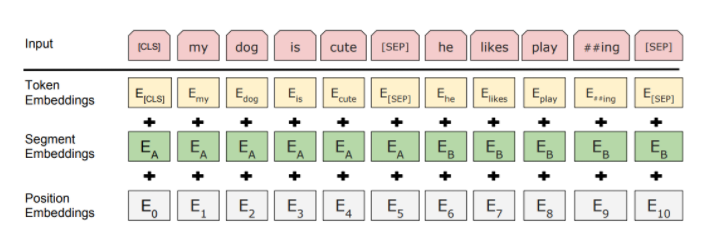

## Start & End Token Classifiers

BERT needs to highlight a "span" of text containing the answer--this is represented as simply predicting which token marks the start of the answer, and which token marks the end.

For every token in the text, we feed its final embedding into the start token classifier. The start token classifier only has a single set of weights (represented by the blue "start" rectangle in the above illustration) which it applies to every word.

After taking the dot product between the output embeddings and the 'start' weights, we apply the softmax activation to produce a probability distribution over all of the words. Whichever word has the highest probability of being the start token is the one that we pick.

We repeat this process for the end token--we have a separate weight vector this.
***********************************************************
BERT는 답변을 포함하는 텍스트의 "범위"를 강조 표시해야합니다. 이것은 단순히 어떤 토큰이 답변의 시작을 표시하고 어떤 토큰이 끝을 표시하는지 예측하는 것으로 나타납니다.

텍스트의 모든 토큰에 대해 최종 임베딩을 시작 토큰 분류기에 공급합니다. 시작 토큰 분류자는 모든 단어에 적용되는 단일 가중치 집합 만 있습니다.

출력 임베딩과 '시작'가중치 사이의 내적을 취한 후 소프트 맥스 활성화를 적용하여 모든 단어에 대한 확률 분포를 생성합니다. 시작 토큰이 될 확률이 가장 높은 단어가 우리가 선택한 단어입니다.

최종 토큰에 대해이 프로세스를 반복합니다. 별도의 가중치 벡터가 있습니다.

# Part 2: Example Code

In the example code below, we'll be downloading a model that's *already been fine-tuned* for question answering, and try it out on our own text.

If you do want to fine-tune on your own dataset, it is possible to fine-tune BERT for question answering yourself. See [run_squad.py](https://github.com/huggingface/transformers/blob/master/examples/run_squad.py) in the `transformers` library. However,you may find that the below "fine-tuned-on-squad" model already does a good job, even if your text is from a different domain. 

> Note: The example code in this Notebook is a commented and expanded version of the short example provided in the `transformers` documentation [here](https://huggingface.co/transformers/model_doc/bert.html?highlight=bertforquestionanswering#transformers.BertForQuestionAnswering).

************************************************************
아래 예제 코드에서 우리는 이미 질문 답변을 위해 미세 조정 된 모델을 다운로드하고 자체 텍스트에서 시도해 볼 것입니다.

자신의 데이터 세트를 미세 조정하려는 경우 BERT를 미세 조정하여 질문에 답할 수 있습니다. Transformers 라이브러리의 run_squad.py를 참조하십시오. 그러나 텍스트가 다른 도메인에서 온 경우에도 아래의 "세부 조정"모델이 이미 잘 작동 함을 알 수 있습니다.

참고 :이 노트북의 예제 코드는 여기 변환기 설명서에 제공된 짧은 예제의 주석 및 확장 버전입니다.

## 1. Install huggingface transformers library

This example uses the `transformers` [library](https://github.com/huggingface/transformers/) by huggingface. We'll start by installing the package.

In [ ]:
!pip install transformers

     |████████████████████████████████| 1.3MB 14.4MB/s 
     |████████████████████████████████| 2.9MB 53.6MB/s 
     |████████████████████████████████| 1.1MB 54.8MB/s 
     |████████████████████████████████| 890kB 56.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=613ef77660cf4d7fe0e8c4410cdfc33226825609905594c1b844828509dc3628
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import torch

## 2. Load Fine-Tuned BERT-large

For Question Answering we use the `BertForQuestionAnswering` class from the `transformers` library.

This class supports fine-tuning, but for this example we will keep things simpler and load a BERT model that has already been fine-tuned for the SQuAD benchmark.

The `transformers` library has a large collection of pre-trained models which you can reference by name and load easily. The full list is in their documentation [here](https://huggingface.co/transformers/pretrained_models.html).

For Question Answering, they have a version of BERT-large that has already been fine-tuned for the SQuAD benchmark. 

BERT-large is really big... it has 24-layers and an embedding size of 1,024, for a total of 340M parameters! Altogether it is 1.34GB, so expect it to take a couple minutes to download to your Colab instance. 

(Note that this download is not using your own network bandwidth--it's between the Google instance and wherever the model is stored on the web).

Note: I believe this model was trained on version 1 of SQuAD, since it's not outputting whether the question is "impossible" to answer from the text (which is part of the task in v2 of SQuAD).
************************************************************

질문 응답을 위해 우리는 변환기 라이브러리의 BertForQuestionAnswering 클래스를 사용합니다.

이 클래스는 미세 조정을 지원하지만이 예제에서는 작업을 더 간단하게 유지하고 SQuAD 벤치 마크에 대해 이미 미세 조정 된 BERT 모델을로드합니다.

Transformers 라이브러리에는 이름으로 참조하고 쉽게로드 할 수있는 사전 학습 된 모델의 대규모 컬렉션이 있습니다. 전체 목록은 여기 문서에 있습니다.

질문 응답의 경우 SQuAD 벤치 마크에 대해 이미 미세 조정 된 BERT-large 버전이 있습니다.

BERT-large는 정말 큽니다. 총 340M 매개 변수에 대해 24 개의 레이어와 1,024 개의 임베딩 크기가 있습니다! 모두 1.34GB이므로 Colab 인스턴스에 다운로드하는 데 몇 분 정도 걸릴 수 있습니다.

(이 다운로드는 자체 네트워크 대역폭을 사용하는 것이 아니라 Google 인스턴스와 모델이 웹에 저장되는 위치 사이에 있습니다.)

참고 :이 모델은 SQuAD 버전 1에서 학습 된 것으로 생각합니다. 질문이 텍스트 (SQuAD v2의 작업의 일부)에서 대답하는 것이 "불가능"한지 여부를 출력하지 않기 때문입니다.

In [ ]:
from transformers import BertForQuestionAnswering

model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')


Load the tokenizer as well. 

Side note: Apparently the vocabulary of this model is identicaly to the one in bert-base-uncased. You can load the tokenizer from `bert-base-uncased` and that works just as well.
***********************************************************
토크나이저 로드합니다.

참고 : 분명히 이 모델의 어휘는 bert-base-uncased의 어휘와 동일합니다. 'bert-base-uncased'에서 토크 나이저를로드 할 수 있으며 마찬가지로 작동합니다.

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

BertTokenizer의 from_pretrained를 이용할 경우 시작부분의 CLS와 문장 구분자 SEP가 자동적으로 삽입

#### 두 문장을 입력하는 경우

[CLS] The man went to the store. [SEP] He bought a gallon of milk. [SEP]

#### 한 문장을 입력하는 경우 

[CLS] The man went to the store. [SEP]

## 3. Ask a Question

Now we're ready to feed in an example!

A QA example consists of a question and a passage of text containing the answer to that question.

Let's try an example using the text in this tutorial!

********************************************
예제가 준비되었다.

QA 예제는 질문과 해당 질문에 대한 답변이 포함 된 텍스트로 구성됩니다.

이 튜토리얼의 텍스트를 사용하여 예제를 시도해 봅시다!

In [ ]:
question = "How many parameters does BERT-large have?"
answer_text = "BERT-large is really big... it has 24-layers and an embedding size of 1,024, for a total of 340M parameters! Altogether it is 1.34GB, so expect it to take a couple minutes to download to your Colab instance."

We'll need to run the BERT tokenizer against both the `question` and the `answer_text`. To feed these into BERT, we actually concatenate them together and place the special [SEP] token in between.
*********************************************
`question`과`answer_text` 모두에 대해 BERT 토크 나이저를 실행해야합니다. 이들을 BERT에 공급하기 위해 실제로 함께 연결하고 그 사이에 특수 [SEP] 토큰을 배치합니다.

=> 토큰화를 진행

In [ ]:
# Apply the tokenizer to the input text, treating them as a text-pair.
# 입력 텍스트로 질문과 대답을 쌍으로 배치하여 대입
input_ids = tokenizer.encode(question, answer_text)

print('The input has a total of {:} tokens.'.format(len(input_ids)))

The input has a total of 70 tokens.


Just to see exactly what the tokenizer is doing, let's print out the tokens with their IDs.
******************************************************
토크나이저가 어떻게 진행되는지 확인하기 위해 ID와 함께 출력

In [ ]:
# BERT only needs the token IDs, but for the purpose of inspecting the 
# tokenizer's behavior, let's also get the token strings and display them.
# BERT는 토큰 ID 만 필요하지만 토크 나이저의 동작, 토큰 문자열도 가져 와서 표시합시다.
tokens = tokenizer.convert_ids_to_tokens(input_ids)

# For each token and its id...
for token, id in zip(tokens, input_ids):
    
    # If this is the [SEP] token, add some space around it to make it stand out.
    # 이것이 [SEP] 토큰 인 경우 눈에 띄도록 주위에 약간의 공간을 추가
    if id == tokenizer.sep_token_id:
        print('')
    
    # Print the token string and its ID in two columns.
    # 콜론(:)을 기준으로 우측에 > 혹은 < 부등호를 사용해서 방향을 지정
    # 오른쪽(>)으로 밀어서 출력 / 왼쪽(<)으로 밀어서 출력
    print('{:<12} {:>6,}'.format(token, id)) 
    

    if id == tokenizer.sep_token_id:
        print('')
    

[CLS]           101
how           2,129
many          2,116
parameters   11,709
does          2,515
bert         14,324
-             1,011
large         2,312
have          2,031
?             1,029

[SEP]           102

bert         14,324
-             1,011
large         2,312
is            2,003
really        2,428
big           2,502
.             1,012
.             1,012
.             1,012
it            2,009
has           2,038
24            2,484
-             1,011
layers        9,014
and           1,998
an            2,019
em            7,861
##bed         8,270
##ding        4,667
size          2,946
of            1,997
1             1,015
,             1,010
02            6,185
##4           2,549
,             1,010
for           2,005
a             1,037
total         2,561
of            1,997
340          16,029
##m           2,213
parameters   11,709
!               999
altogether   10,462
it            2,009
is            2,003
1             1,015
.             1,01

We've concatenated the `question` and `answer_text` together, but BERT still needs a way to distinguish them. BERT has two special "Segment" embeddings, one for segment "A" and one for segment "B". Before the word embeddings go into the BERT layers, the segment A embedding needs to be added to the `question` tokens, and the segment B embedding needs to be added to each of the `answer_text` tokens. 

These additions are handled for us by the `transformer` library, and all we need to do is specify a '0' or '1' for each token. 

Note: In the `transformers` library, huggingface likes to call these `token_type_ids`, but I'm going with `segment_ids` since this seems clearer, and is consistent with the BERT paper.
************************************************************
질문과 answer_text를 함께 연결했지만 BERT는 여전히 이를 구분할 방법이 필요합니다. BERT에는 세그먼트 "A"용과 세그먼트 "B"용으로 하나씩 두 개의 특수 "세그먼트"임베딩이 있습니다. 단어 임베딩이 BERT 레이어로 이동하기 전에 세그먼트 A 임베딩을 질문 토큰에 추가하고 세그먼트 B 임베딩을 각 answer_text 토큰에 추가해야합니다.

이러한 추가는 변환기 라이브러리에 의해 처리되며 각 토큰에 대해 '0'또는 '1'을 지정하기 만하면됩니다.

참고 : 변환기 라이브러리에서 허깅 페이스는이 token_type_ids를 호출하는 것을 좋아하지만, 이것이 더 명확 해 보이고 BERT 문서와 일치하기 때문에 segment_ids를 사용하겠습니다.

In [ ]:
# Search the input_ids for the first instance of the `[SEP]` token.
# `[SEP]`토큰의 첫 번째 인스턴스에 대한 input_ids를 검색합니다
sep_index = input_ids.index(tokenizer.sep_token_id)

# The number of segment A tokens includes the [SEP] token it self.
# 세그먼트 A 토큰의 수에는 [SEP] 토큰 자체가 포함됩니다
num_seg_a = sep_index + 1

# The remainder are segment B.
num_seg_b = len(input_ids) - num_seg_a

# Construct the list of 0s and 1s.
# 0, 1의 리스트 구성
# 0 : segment A / 1 : segment B
segment_ids = [0]*num_seg_a + [1]*num_seg_b

# There should be a segment_id for every input token.
# 모든 입력 토큰에 대해 segment_id가 있어야합니다.
assert len(segment_ids) == len(input_ids)

>*Side Note: Where's the padding?*
>
> The original [example code](https://huggingface.co/transformers/model_doc/bert.html?highlight=bertforquestionanswering#transformers.BertForQuestionAnswering) does not perform any padding. I suspect that this is because we are only feeding in a *single example*. If we instead fed in a batch of examples, then we would need to pad or truncate all of the samples in the batch to a single length, and supply an attention mask to tell BERT to ignore the padding tokens. 
***********************************************************
참고 : 패딩은 어디에 있습니까?

원래 예제 코드는 패딩을 수행하지 않습니다. 나는 이것이 우리가 하나의 예에서만 먹이를주기 때문이라고 생각합니다. 대신 예제 배치를 제공하는 경우 배치의 모든 샘플을 단일 길이로 채우거나 자르고 BERT에 패딩 토큰을 무시하도록 알리는주의 마스크를 제공해야합니다.

=> 일반적으로는 패딩을 통해 토큰의 길이를 맞춘 후 mask를 적용하여 패딩토큰 무시하도록 설정

We're ready to feed our example into the model!



In [ ]:
# Run our example through the model.
start_scores, end_scores = model(torch.tensor([input_ids]), # The tokens representing our input text. # 입력 텍스트를 나타내는 토큰
                                 token_type_ids=torch.tensor([segment_ids])) # The segment IDs to differentiate question from answer_text # 질문을 answer_text와 구분하기위한 세그먼트 ID


transformer에서 attention을 이용해서 각 단어들의 연관성을 임베딩 후 제일 높은 수를 start와 end에 저장

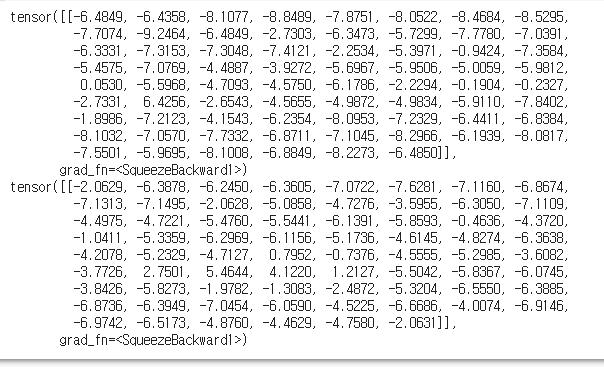

Now we can highlight the answer just by looking at the most probable start and end words. 
*****************************************************
가장 가능성 있는 시작과 끝 단어를 강조할 수 있다.

In [ ]:
# Find the tokens with the highest `start` and `end` scores.
answer_start = torch.argmax(start_scores)
answer_end = torch.argmax(end_scores)

# Combine the tokens in the answer and print it out.
answer = ' '.join(tokens[answer_start:answer_end+1])

print('Answer: "' + answer + '"')

Answer: "340 ##m"


It got it right! Awesome :)

> *Side Note: It's a little naive to pick the highest scores for start and end--what if it predicts an end word that's before the start word?! The correct implementation is to pick the highest total score for which end >= start.*
**********************************************************
참고 : 시작과 끝에서 가장 높은 점수를 선택하는 것은 약간 단순합니다. 시작 단어 앞에있는 끝 단어를 예측하면 어떨까요?
 올바른 구현은 끝 > = 시작에 대해 가장 높은 총 점수를 선택하는 것입니다. 

With a little more effort, we can reconstruct any words that got broken down into subwords.
********************************************************
답을 보기 쉽게 정제

In [ ]:
# Start with the first token.
answer = tokens[answer_start]

# Select the remaining answer tokens and join them with whitespace.
for i in range(answer_start + 1, answer_end + 1):
    
    # If it's a subword token, then recombine it with the previous token.
    if tokens[i][0:2] == '##':
        answer += tokens[i][2:]
    
    # Otherwise, add a space then the token.
    else:
        answer += ' ' + tokens[i]

print('Answer: "' + answer + '"')

Answer: "340m"


## 4. Visualizing Scores

I was curious to see what the scores were for all of the words. The following cells generate bar plots showing the start and end scores for every word in the input.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
#sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (16,8)

Retrieve all of the start and end scores, and use all of the tokens as x-axis labels.
***********************************************************
모든 시작 및 종료 점수를 검색하고 모든 토큰을 x 축 레이블로 사용합니다.

In [ ]:
# Pull the scores out of PyTorch Tensors and convert them to 1D numpy arrays.
# 1차원 numpy배열로 변환
s_scores = start_scores.detach().numpy().flatten()
e_scores = end_scores.detach().numpy().flatten()

# We'll use the tokens as the x-axis labels. In order to do that, they all need
# to be unique, so we'll add the token index to the end of each one.
# 토큰을 x 축 레이블로 사용합니다. 그러기 위해서는 모두 고유해야하므로 각각의 끝에 토큰 인덱스를 추가합니다.
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))


Create a bar plot showing the score for every input word being the "start" word.

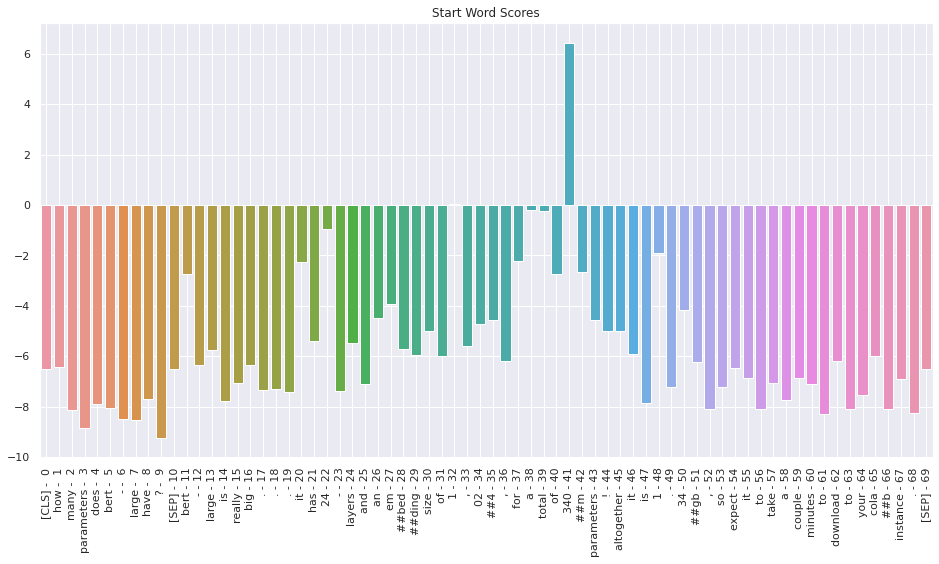

In [ ]:
# Create a barplot showing the start word score for all of the tokens.
# 모든 토큰에 대한 시작 단어 점수를 보여주는 막대 그래프를 만듭니다.
ax = sns.barplot(x=token_labels, y=s_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('Start Word Scores')

plt.show()

Create a second bar plot showing the score for every input word being the "end" word.

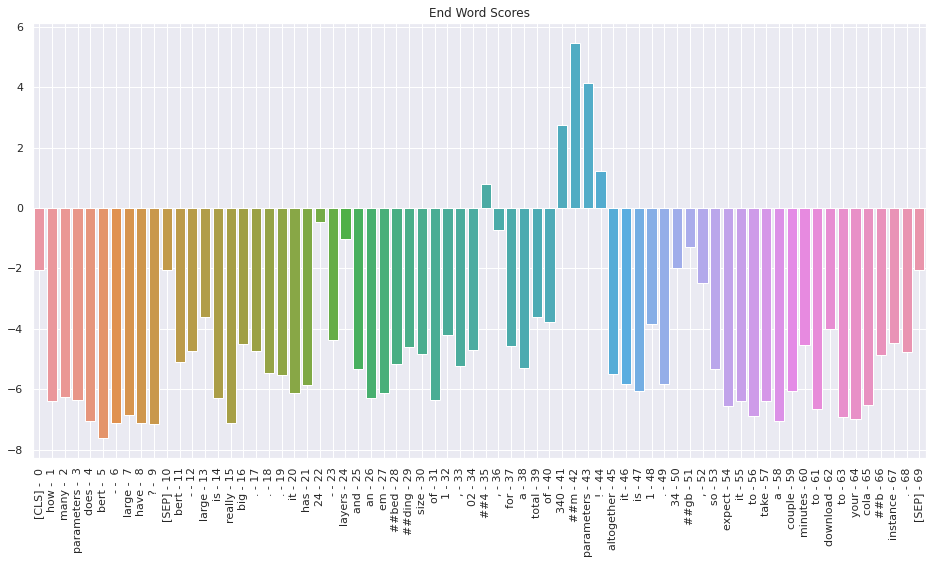

In [ ]:
# Create a barplot showing the end word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=e_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('End Word Scores')

plt.show()

**Alternate View**

I also tried visualizing both the start and end scores on a single bar plot, but I think it may actually be more confusing then seeing them separately. 

In [ ]:
import pandas as pd

# Store the tokens and scores in a DataFrame. 
# Each token will have two rows, one for its start score and one for its end
# score. The "marker" column will differentiate them. A little wacky, I know.
scores = []
for (i, token_label) in enumerate(token_labels):

    # Add the token's start score as one row.
    scores.append({'token_label': token_label, 
                   'score': s_scores[i],
                   'marker': 'start'})
    
    # Add  the token's end score as another row.
    scores.append({'token_label': token_label, 
                   'score': e_scores[i],
                   'marker': 'end'})
    
df = pd.DataFrame(scores)


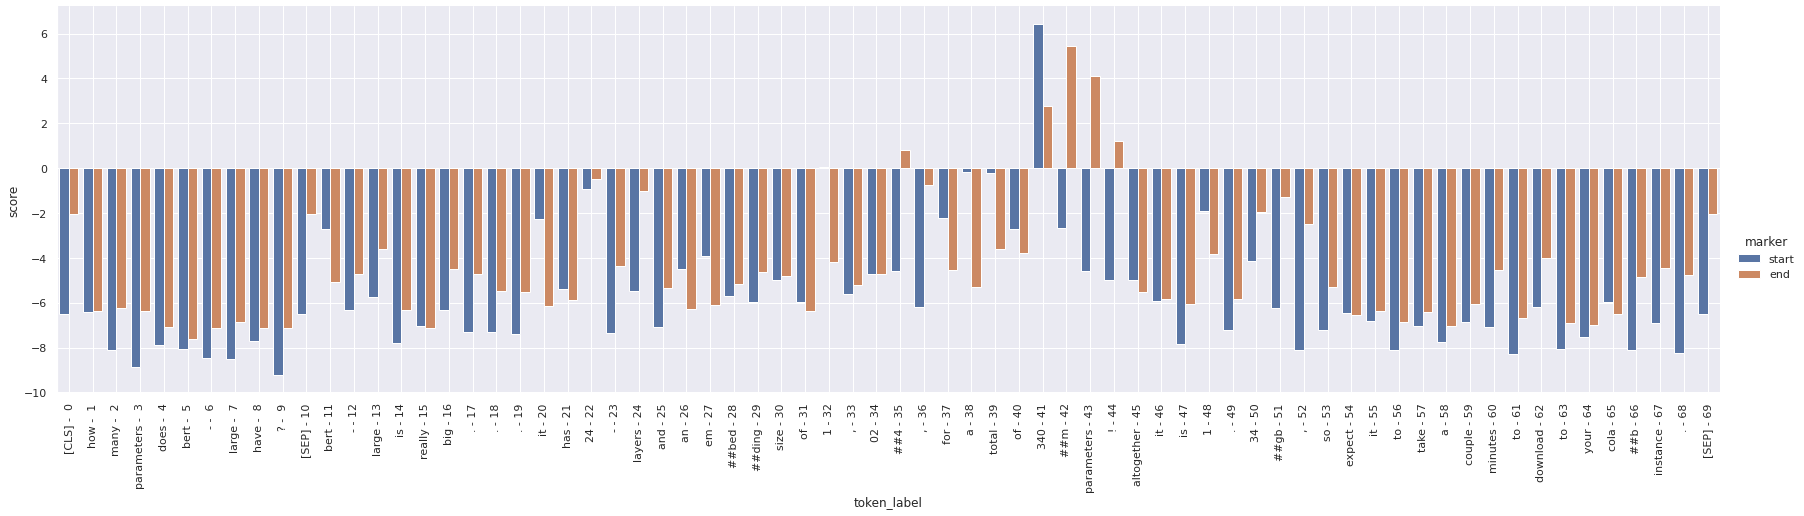

In [ ]:
# Draw a grouped barplot to show start and end scores for each word.
# The "hue" parameter is where we tell it which datapoints belong to which
# of the two series.
g = sns.catplot(x="token_label", y="score", hue="marker", data=df,
                kind="bar", height=6, aspect=4)

# Turn the xlabels vertical.
g.set_xticklabels(g.ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
g.ax.grid(True)


## 5. More Examples

Turn the QA process into a function so we can easily try out other examples.

In [ ]:
def answer_question(question, answer_text):
    '''
    Takes a `question` string and an `answer_text` string (which contains the
    answer), and identifies the words within the `answer_text` that are the
    answer. Prints them out.
    '''
    # ======== Tokenize ========
    # Apply the tokenizer to the input text, treating them as a text-pair.
    input_ids = tokenizer.encode(question, answer_text)

    # Report how long the input sequence is.
    print('Query has {:,} tokens.\n'.format(len(input_ids)))

    # ======== Set Segment IDs ========
    # Search the input_ids for the first instance of the `[SEP]` token.
    sep_index = input_ids.index(tokenizer.sep_token_id)

    # The number of segment A tokens includes the [SEP] token istelf.
    num_seg_a = sep_index + 1

    # The remainder are segment B.
    num_seg_b = len(input_ids) - num_seg_a

    # Construct the list of 0s and 1s.
    segment_ids = [0]*num_seg_a + [1]*num_seg_b

    # There should be a segment_id for every input token.
    assert len(segment_ids) == len(input_ids)

    # ======== Evaluate ========
    # Run our example question through the model.
    start_scores, end_scores = model(torch.tensor([input_ids]), # The tokens representing our input text.
                                    token_type_ids=torch.tensor([segment_ids])) # The segment IDs to differentiate question from answer_text

    # ======== Reconstruct Answer ========
    # Find the tokens with the highest `start` and `end` scores.
    answer_start = torch.argmax(start_scores)
    answer_end = torch.argmax(end_scores)

    # Get the string versions of the input tokens.
    tokens = tokenizer.convert_ids_to_tokens(input_ids)

    # Start with the first token.
    answer = tokens[answer_start]

    # Select the remaining answer tokens and join them with whitespace.
    for i in range(answer_start + 1, answer_end + 1):
        
        # If it's a subword token, then recombine it with the previous token.
        if tokens[i][0:2] == '##':
            answer += tokens[i][2:]
        
        # Otherwise, add a space then the token.
        else:
            answer += ' ' + tokens[i]

    print('Answer: "' + answer + '"')

As our reference text, I've taken the Abstract of the [BERT paper](https://arxiv.org/pdf/1810.04805.pdf).


In [ ]:
import textwrap

# Wrap text to 80 characters.
# 최대 width의 길이만큼 채움
wrapper = textwrap.TextWrapper(width=80) 

bert_abstract = "We introduce a new language representation model called BERT, which stands for Bidirectional Encoder Representations from Transformers. Unlike recent language representation models (Peters et al., 2018a; Radford et al., 2018), BERT is designed to pretrain deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be finetuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial taskspecific architecture modifications. BERT is conceptually simple and empirically powerful. It obtains new state-of-the-art results on eleven natural language processing tasks, including pushing the GLUE score to 80.5% (7.7% point absolute improvement), MultiNLI accuracy to 86.7% (4.6% absolute improvement), SQuAD v1.1 question answering Test F1 to 93.2 (1.5 point absolute improvement) and SQuAD v2.0 Test F1 to 83.1 (5.1 point absolute improvement)."

print(wrapper.fill(bert_abstract))

We introduce a new language representation model called BERT, which stands for
Bidirectional Encoder Representations from Transformers. Unlike recent language
representation models (Peters et al., 2018a; Radford et al., 2018), BERT is
designed to pretrain deep bidirectional representations from unlabeled text by
jointly conditioning on both left and right context in all layers. As a result,
the pre-trained BERT model can be finetuned with just one additional output
layer to create state-of-the-art models for a wide range of tasks, such as
question answering and language inference, without substantial taskspecific
architecture modifications. BERT is conceptually simple and empirically
powerful. It obtains new state-of-the-art results on eleven natural language
processing tasks, including pushing the GLUE score to 80.5% (7.7% point absolute
improvement), MultiNLI accuracy to 86.7% (4.6% absolute improvement), SQuAD v1.1
question answering Test F1 to 93.2 (1.5 point absolute improvement) 

-----------------------------
Ask BERT what its name stands for (the answer is in the first sentence of the abstract).

In [ ]:
question = "What does the 'B' in BERT stand for?"

answer_question(question, bert_abstract)

Query has 258 tokens.

Answer: "bidirectional encoder representations from transformers"


# start_scores
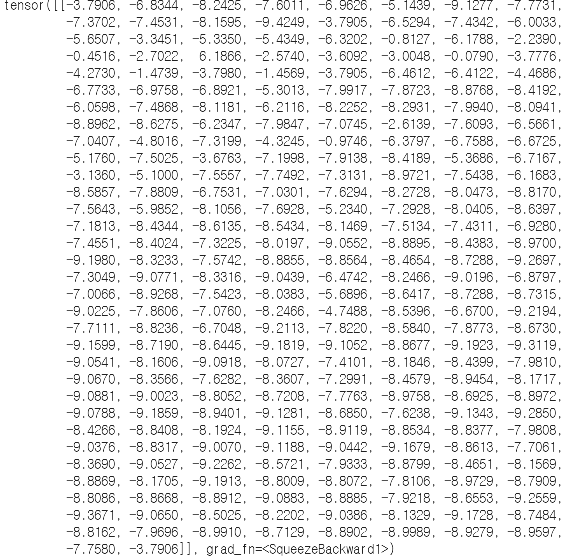

# end_scores
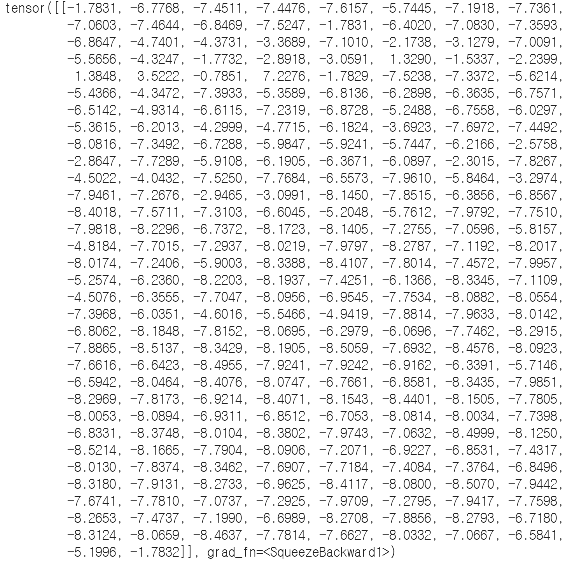

---------------------
Ask BERT about example applications of itself :)

The answer to the question comes from this passage from the abstract: 

> "...BERT model can be finetuned with just one additional output
layer to create state-of-the-art models for **a wide range of tasks, such as
question answering and language inference,** without substantial taskspecific
architecture modifications."

*********************************************************
BERT에게 그 자체의 예제 응용 프로그램에 대해 문의하십시오 

질문에 대한 답은 구절에서 나옵니다.

"... BERT 모델은 단 하나의 추가 출력 레이어로 미세 조정하여 실질적인 작업 별 아키텍처 수정없이 질문 답변 및 언어 추론과 같은 광범위한 작업을위한 최신 모델을 생성 할 수 있습니다."

In [ ]:
question = "What are some example applications of BERT?"

answer_question(question, bert_abstract)

Query has 255 tokens.

Answer: "question answering and language inference"
